# Social Network Analysis - Like Relation

In [1]:
import numpy as np
from networkx import nx
import pandas as pd
import matplotlib.pyplot as plt

import itertools

## Getting the data

In [2]:
postings_1 = pd.read_csv('data/Postings_01052019_15052019.csv', sep=';')
postings_2 = pd.read_csv('data/Postings_16052019_31052019.csv', sep=';')
postings = pd.concat([postings_1,postings_2])
postings['PostingCreatedAt'] = postings.PostingCreatedAt.astype('datetime64')
postings['ArticlePublishingDate'] = postings.ArticlePublishingDate.astype('datetime64')
postings['UserCreatedAt'] = postings.UserCreatedAt.astype('datetime64')
postings.head()

ID_Posting  ID_Posting_Parent  ID_CommunityIdentity  \
0  1041073586       1.041073e+09                671476   
1  1041073839       1.041073e+09                566938   
2  1041073872       1.041069e+09                669286   
3  1041080734       1.041080e+09                671476   
4  1041080828                NaN                671476   

                                     PostingHeadline  \
0  Das hat gestern bereits der Voggenhuber angefü...   
1                                                NaN   
2                                                NaN   
3                  Sie haben doch nichts gefordert??   
4  Heute wäre der perfekte Tag für die SPÖ gewese...   

                                      PostingComment        PostingCreatedAt  \
0  schieder hatte dem inhaltlich nichts entgegenz... 2019-05-01 18:21:15.127   
1     ...und meinen Bezirk bekommst du als Erbe mit. 2019-05-01 18:28:22.040   
2  Nein, bei der ÖVP/FPÖ genauso passiert. Ich wo... 2019-05-01 18:29:05.533   
3  sie haben nur die regierung kritisiert. das di... 2019-05-01 22:37:56.010   
4  ihr noch nicht erfülltes versprechen, den silb... 2019-05-01 22:42:06.310   

      ID_Article   ArticlePublishingDate  \
0  2000102330973 2019-05-01 10:28:57.490   
1  2000102330973 2019-05-01 10:28:57.490   
2  2000102330973 2019-05-01 10:28:57.490   
3  2000102330973 2019-05-01 10:28:57.490   
4  2000102330973 2019-05-01 10:28:57.490   

                                        ArticleTitle ArticleChannel  \
0  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
1  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
2  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
3  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
4  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   

  ArticleRessortName UserCommunityName UserGender           UserCreatedAt  
0           Parteien       Ravenspower        NaN 2018-04-14 13:42:28.470  
1           Parteien        AlphaRomeo          m 2015-08-28 17:07:41.110  
2           Parteien        Hpolditsch        NaN 2018-03-06 20:03:42.737  
3           Parteien       Ravenspower        NaN 2018-04-14 13:42:28.470  
4           Parteien       Ravenspower        NaN 2018-04-14 13:42:28.470

In [3]:
votes_1 = pd.read_csv('data/Votes_01052019_15052019.csv', sep=';')
votes_2 = pd.read_csv('data/Votes_16052019_31052019.csv', sep=';')
votes = pd.concat([votes_1,votes_2], ignore_index = True)
votes['VoteCreatedAt'] = votes.VoteCreatedAt.astype('datetime64')
votes['UserCreatedAt'] = votes.UserCreatedAt.astype('datetime64')
votes.head()

ID_CommunityIdentity  ID_Posting  VoteNegative  VotePositive  \
0                675862  1041076570             1             0   
1                689023  1041076570             1             0   
2                 24810  1041076745             0             1   
3                673781  1041076745             0             1   
4                 24810  1041076831             0             1   

            VoteCreatedAt    UserCommunityName UserGender  \
0 2019-05-06 16:47:46.883  Heckscheibenwischer          m   
1 2019-05-01 22:19:06.240      Heinz Fettleber        NaN   
2 2019-05-01 23:54:54.600       Bruce Campbell          m   
3 2019-05-01 20:59:29.910         Erdäpfelsack        NaN   
4 2019-05-01 23:51:42.730       Bruce Campbell          m   

            UserCreatedAt  
0 2018-06-26 06:04:30.513  
1 2019-03-08 21:23:11.463  
2 2011-01-12 16:50:40.597  
3 2018-05-29 07:13:49.350  
4 2011-01-12 16:50:40.597

In [4]:
follow = pd.read_csv('data/Following_Ignoring_Relationships_01052019_31052019.csv', sep=';')
follow.head()

ID_CommunityIdentity  ID_CommunityIdentityConnectedTo  \
0                  1778                           246490   
1                  5872                             5872   
2                  9030                            23875   
3                  9030                           508504   
4                 10569                            10569   

   ID_CommunityConnectionType  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1

Select the relevant columns for the definition of the Like relation.

In [6]:
df = votes.merge(postings, on = 'ID_Posting', suffixes = ['_Voter', '_Commenter'], how = 'inner')
df['Vote'] = np.where(df['VoteNegative']== 1, -1, 1)
df = df[['ID_Posting', 'ID_CommunityIdentity_Voter', 'Vote', 'VoteCreatedAt',
         'ID_CommunityIdentity_Commenter', 'PostingHeadline', 'PostingComment', 'PostingCreatedAt']]
df.head()

ID_Posting  ID_CommunityIdentity_Voter  Vote            VoteCreatedAt  \
0  1041076570                      675862    -1  2019-05-06 16:47:46.883   
1  1041076570                      689023    -1  2019-05-01 22:19:06.240   
2  1041076570                      606376     1  2019-05-01 20:46:16.267   
3  1041076745                       24810     1  2019-05-01 23:54:54.600   
4  1041076745                      673781     1  2019-05-01 20:59:29.910   

   ID_CommunityIdentity_Commenter  \
0                          691035   
1                          691035   
2                          691035   
3                          581068   
4                          581068   

                                     PostingHeadline  \
0  Super toll so ein Posting ("Heisl") stehen zu ...   
1  Super toll so ein Posting ("Heisl") stehen zu ...   
2  Super toll so ein Posting ("Heisl") stehen zu ...   
3                                                NaN   
4                                                NaN   

                                      PostingComment         PostingCreatedAt  
0  ... und dafür sachlich formulierte Postings, w...  2019-05-01 20:04:07.580  
1  ... und dafür sachlich formulierte Postings, w...  2019-05-01 20:04:07.580  
2  ... und dafür sachlich formulierte Postings, w...  2019-05-01 20:04:07.580  
3  Maduro ist kein Diktator und ER hat das Land n...  2019-05-01 20:11:30.570  
4  Maduro ist kein Diktator und ER hat das Land n...  2019-05-01 20:11:30.570

In [6]:
df_day_1 = votes[(votes.VoteCreatedAt >= '2019-05-01') & (votes.VoteCreatedAt < '2019-05-02')].merge(postings, 
                on = 'ID_Posting', suffixes = ['_Voter', '_Commenter'], how = 'inner')
df_day_1['Vote'] = np.where(df_day_1['VoteNegative']== 1, -1, 1)
df_day_1 = df_day_1[['ID_Posting', 'ID_CommunityIdentity_Voter', 'Vote', 'VoteCreatedAt',
         'ID_CommunityIdentity_Commenter', 'PostingHeadline', 'PostingComment', 'PostingCreatedAt']]
df_day_1

ID_Posting  ID_CommunityIdentity_Voter  Vote           VoteCreatedAt  \
0      1041076570                      689023    -1 2019-05-01 22:19:06.240   
1      1041076570                      606376     1 2019-05-01 20:46:16.267   
2      1041076745                       24810     1 2019-05-01 23:54:54.600   
3      1041076745                      673781     1 2019-05-01 20:59:29.910   
4      1041076745                       97863     1 2019-05-01 21:01:16.430   
...           ...                         ...   ...                     ...   
63904  1041076187                      688281     1 2019-05-01 20:39:43.957   
63905  1041075839                      576568     1 2019-05-01 20:21:48.470   
63906  1041076403                      688281     1 2019-05-01 20:33:53.200   
63907  1041076403                      691333     1 2019-05-01 20:05:33.723   
63908  1041066559                      230022    -1 2019-05-01 15:01:02.723   

       ID_CommunityIdentity_Commenter  \
0                              691035   
1                              691035   
2                              581068   
3                              581068   
4                              581068   
...                               ...   
63904                          634421   
63905                          669167   
63906                            1493   
63907                            1493   
63908                          248535   

                                         PostingHeadline  \
0      Super toll so ein Posting ("Heisl") stehen zu ...   
1      Super toll so ein Posting ("Heisl") stehen zu ...   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
63904                                                NaN   
63905   Der Landbauer hat ja auch Migrationshintergrund.   
63906                                                NaN   
63907                                                NaN   
63908                                                NaN   

                                          PostingComment  \
0      ... und dafür sachlich formulierte Postings, w...   
1      ... und dafür sachlich formulierte Postings, w...   
2      Maduro ist kein Diktator und ER hat das Land n...   
3      Maduro ist kein Diktator und ER hat das Land n...   
4      Maduro ist kein Diktator und ER hat das Land n...   
...                                                  ...   
63904                         Ist das alles von der SPÖ?   
63905  Aber bei dem stimmt die Gesinnung, da nehmen s...   
63906  Es haben aber auch viele Arbeiter gar nicht ge...   
63907  Es haben aber auch viele Arbeiter gar nicht ge...   
63908  Weil das nach § 186 StGB eine vorsätzliche Gef...   

             PostingCreatedAt  
0     2019-05-01 20:04:07.580  
1     2019-05-01 20:04:07.580  
2     2019-05-01 20:11:30.570  
3     2019-05-01 20:11:30.570  
4     2019-05-01 20:11:30.570  
...                       ...  
63904 2019-05-01 19:45:33.437  
63905 2019-05-01 19:31:00.420  
63906 2019-05-01 19:55:34.680  
63907 2019-05-01 19:55:34.680  
63908 2019-05-01 14:20:02.870  

[63909 rows x 8 columns]

In [13]:
df_per_day = []

for i in range(1,31):
    df_day = votes[(votes.VoteCreatedAt >= '2019-05-{}'.format(str(i).zfill(2))) & 
                   (votes.VoteCreatedAt < '2019-05-{}'.format(str(i+1).zfill(2)))].merge(postings, 
                    on = 'ID_Posting', suffixes = ['_Voter', '_Commenter'], how = 'inner')
    df_day['Day'] = i
    df_day['Vote'] = np.where(df_day['VoteNegative']== 1, -1, 1)
    df_day = df_day[['ID_Posting', 'ID_CommunityIdentity_Voter', 'Vote', 'Day', 
                     'ID_CommunityIdentity_Commenter', 'PostingHeadline', 'PostingComment']]
    df_per_day.append(df_day)

df_day = votes[(votes.VoteCreatedAt >= '2019-05-31') & (votes.VoteCreatedAt < '2019-06-01')].merge(postings, 
                    on = 'ID_Posting', suffixes = ['_Voter', '_Commenter'], how = 'inner')
df_day['Day'] = 31
df_day['Vote'] = np.where(df_day['VoteNegative']== 1, -1, 1)
df_day = df_day[['ID_Posting', 'ID_CommunityIdentity_Voter', 'Vote', 'Day', 
                 'ID_CommunityIdentity_Commenter', 'PostingHeadline', 'PostingComment']]
df_per_day.append(df_day)

## Edges

We want that the structure of our network followss the following format: 
* source, i.e., the voting user
* target, i.e., the commenter user
* weight, i.e., sum of positive votes minus sum of negative votes

In [13]:
edges = df[['ID_CommunityIdentity_Voter', 'ID_CommunityIdentity_Commenter', 'Vote']].groupby(
            ['ID_CommunityIdentity_Voter', 'ID_CommunityIdentity_Commenter']).sum()
edges.reset_index(inplace = True)
edges.rename(columns = {'ID_CommunityIdentity_Voter': 'source', 'ID_CommunityIdentity_Commenter': 'target',
                        'Vote': 'weight'}, inplace = True)
edges.head(10)

source  target  weight
0       4    6602      -1
1       4  502011       1
2       4  536995       1
3       4  577993       1
4       4  679697       1
5       4  691736      -1
6      30   55475       1
7      30  127715      -1
8      30  135535       1
9      30  177260       1

In [16]:
edges.to_csv("data/vote_to_edges.csv", index=False)

In [8]:
edges_day_1 = df_day_1[['ID_CommunityIdentity_Voter', 'ID_CommunityIdentity_Commenter', 'Vote']].groupby(
            ['ID_CommunityIdentity_Voter', 'ID_CommunityIdentity_Commenter']).sum()
edges_day_1.reset_index(inplace = True)
edges_day_1.rename(columns = {'ID_CommunityIdentity_Voter': 'source', 'ID_CommunityIdentity_Commenter': 'target',
                        'Vote': 'weight'}, inplace = True)
edges_day_1

source  target  weight
0         304  691675       1
1         657   45168       1
2         657   77270       1
3         657  107341       1
4         657  108019       1
...       ...     ...     ...
55910  691683   76577       1
55911  691683  503714      -1
55912  691683  519140       1
55913  691683  535493       1
55914  691683  567774      -1

[55915 rows x 3 columns]

In [9]:
edges_day_1.to_csv("data/vote_to_edges_day_1.csv", index=False)

In [15]:
edges_day_1_neutral = df_day_1[['ID_CommunityIdentity_Voter', 'ID_CommunityIdentity_Commenter', 'Vote']].groupby(
            ['ID_CommunityIdentity_Voter', 'ID_CommunityIdentity_Commenter']).count()
edges_day_1_neutral.reset_index(inplace = True)
edges_day_1_neutral.rename(columns = {'ID_CommunityIdentity_Voter': 'source', 
                                         'ID_CommunityIdentity_Commenter': 'target',
                                         'Vote': 'weight'}, inplace = True)
edges_day_1_neutral

source  target  weight
0         304  691675       1
1         657   45168       1
2         657   77270       1
3         657  107341       1
4         657  108019       1
...       ...     ...     ...
55910  691683   76577       1
55911  691683  503714       1
55912  691683  519140       1
55913  691683  535493       1
55914  691683  567774       1

[55915 rows x 3 columns]

In [18]:
edges_day_1_neutral.to_csv("data/vote_to_edges_day_1_neutral.csv", index=False)

In [20]:
edges_days = pd.DataFrame(columns = ['source', 'target', 'weight', 'day'])

for i in range(31):
    edges_day = df_per_day[i][['ID_CommunityIdentity_Voter', 'ID_CommunityIdentity_Commenter', 'Vote']].groupby(
            ['ID_CommunityIdentity_Voter', 'ID_CommunityIdentity_Commenter']).sum()
    edges_day.reset_index(inplace = True)
    edges_day.rename(columns = {'ID_CommunityIdentity_Voter': 'source', 'ID_CommunityIdentity_Commenter': 'target',
                        'Vote': 'weight'}, inplace = True)
    edges_day['day'] = df_per_day[i].loc[0, 'Day']
    edges_days = pd.concat([edges_days, edges_day])

In [22]:
edges_days.to_csv("data/vote_to_edges_days.csv", index=False)

## Graph

Global dataset

In [2]:
edges = pd.read_csv("data/vote_to_edges.csv")

In [3]:
G = nx.from_pandas_edgelist(edges, edge_attr = 'weight', create_using=nx.DiGraph())

In [46]:
fig = plt.figure(figsize=(50,50))
nx.draw_spring(G)
plt.show()

KeyboardInterrupt: 

<Figure size 3600x3600 with 0 Axes>

In [22]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 32667
Number of edges: 2953371
Average in degree:  90.4084
Average out degree:  90.4084


In [29]:
print('Minimal weight: ', edges.weight.min())
print('Maximal weight: ', edges.weight.max())
print('Mean weight: ', edges.weight.mean())

Minimal weight:  -228
Maximal weight:  416
Mean weight:  0.7450895942297802


In [32]:
print('Network density: ', nx.density(G))

Network density:  0.0027676603744535627


In [33]:
distances = [list(nx.single_source_shortest_path_length(G,N).values()) for N in G.nodes]
distances = [distance for single_distances in distances for distance in single_distances if distance > 0]
print('Network average distance: ', np.mean(distances))

KeyboardInterrupt: 

In [ ]:
hubs_auth = nx.hits(G)
print('Hub scores: ', sorted(hubs_auth[0].items(), key=itemgetter(1), reverse=True)[:5])
print('Authority scores: ', sorted(hubs_auth[1].items(), key=itemgetter(1), reverse=True)[:5])
print('Page rank: ', sorted(nx.pagerank(G).items(), key=itemgetter(1), reverse=True)[:5])

Dataset for May 1st

In [2]:
edges_day_1 = pd.read_csv("data/vote_to_edges_day_1.csv")

In [3]:
G_day_1 = nx.from_pandas_edgelist(edges_day_1, edge_attr = 'weight', create_using=nx.DiGraph())
G_day_1_undirected = nx.from_pandas_edgelist(edges_day_1, edge_attr = 'weight', create_using=nx.Graph())

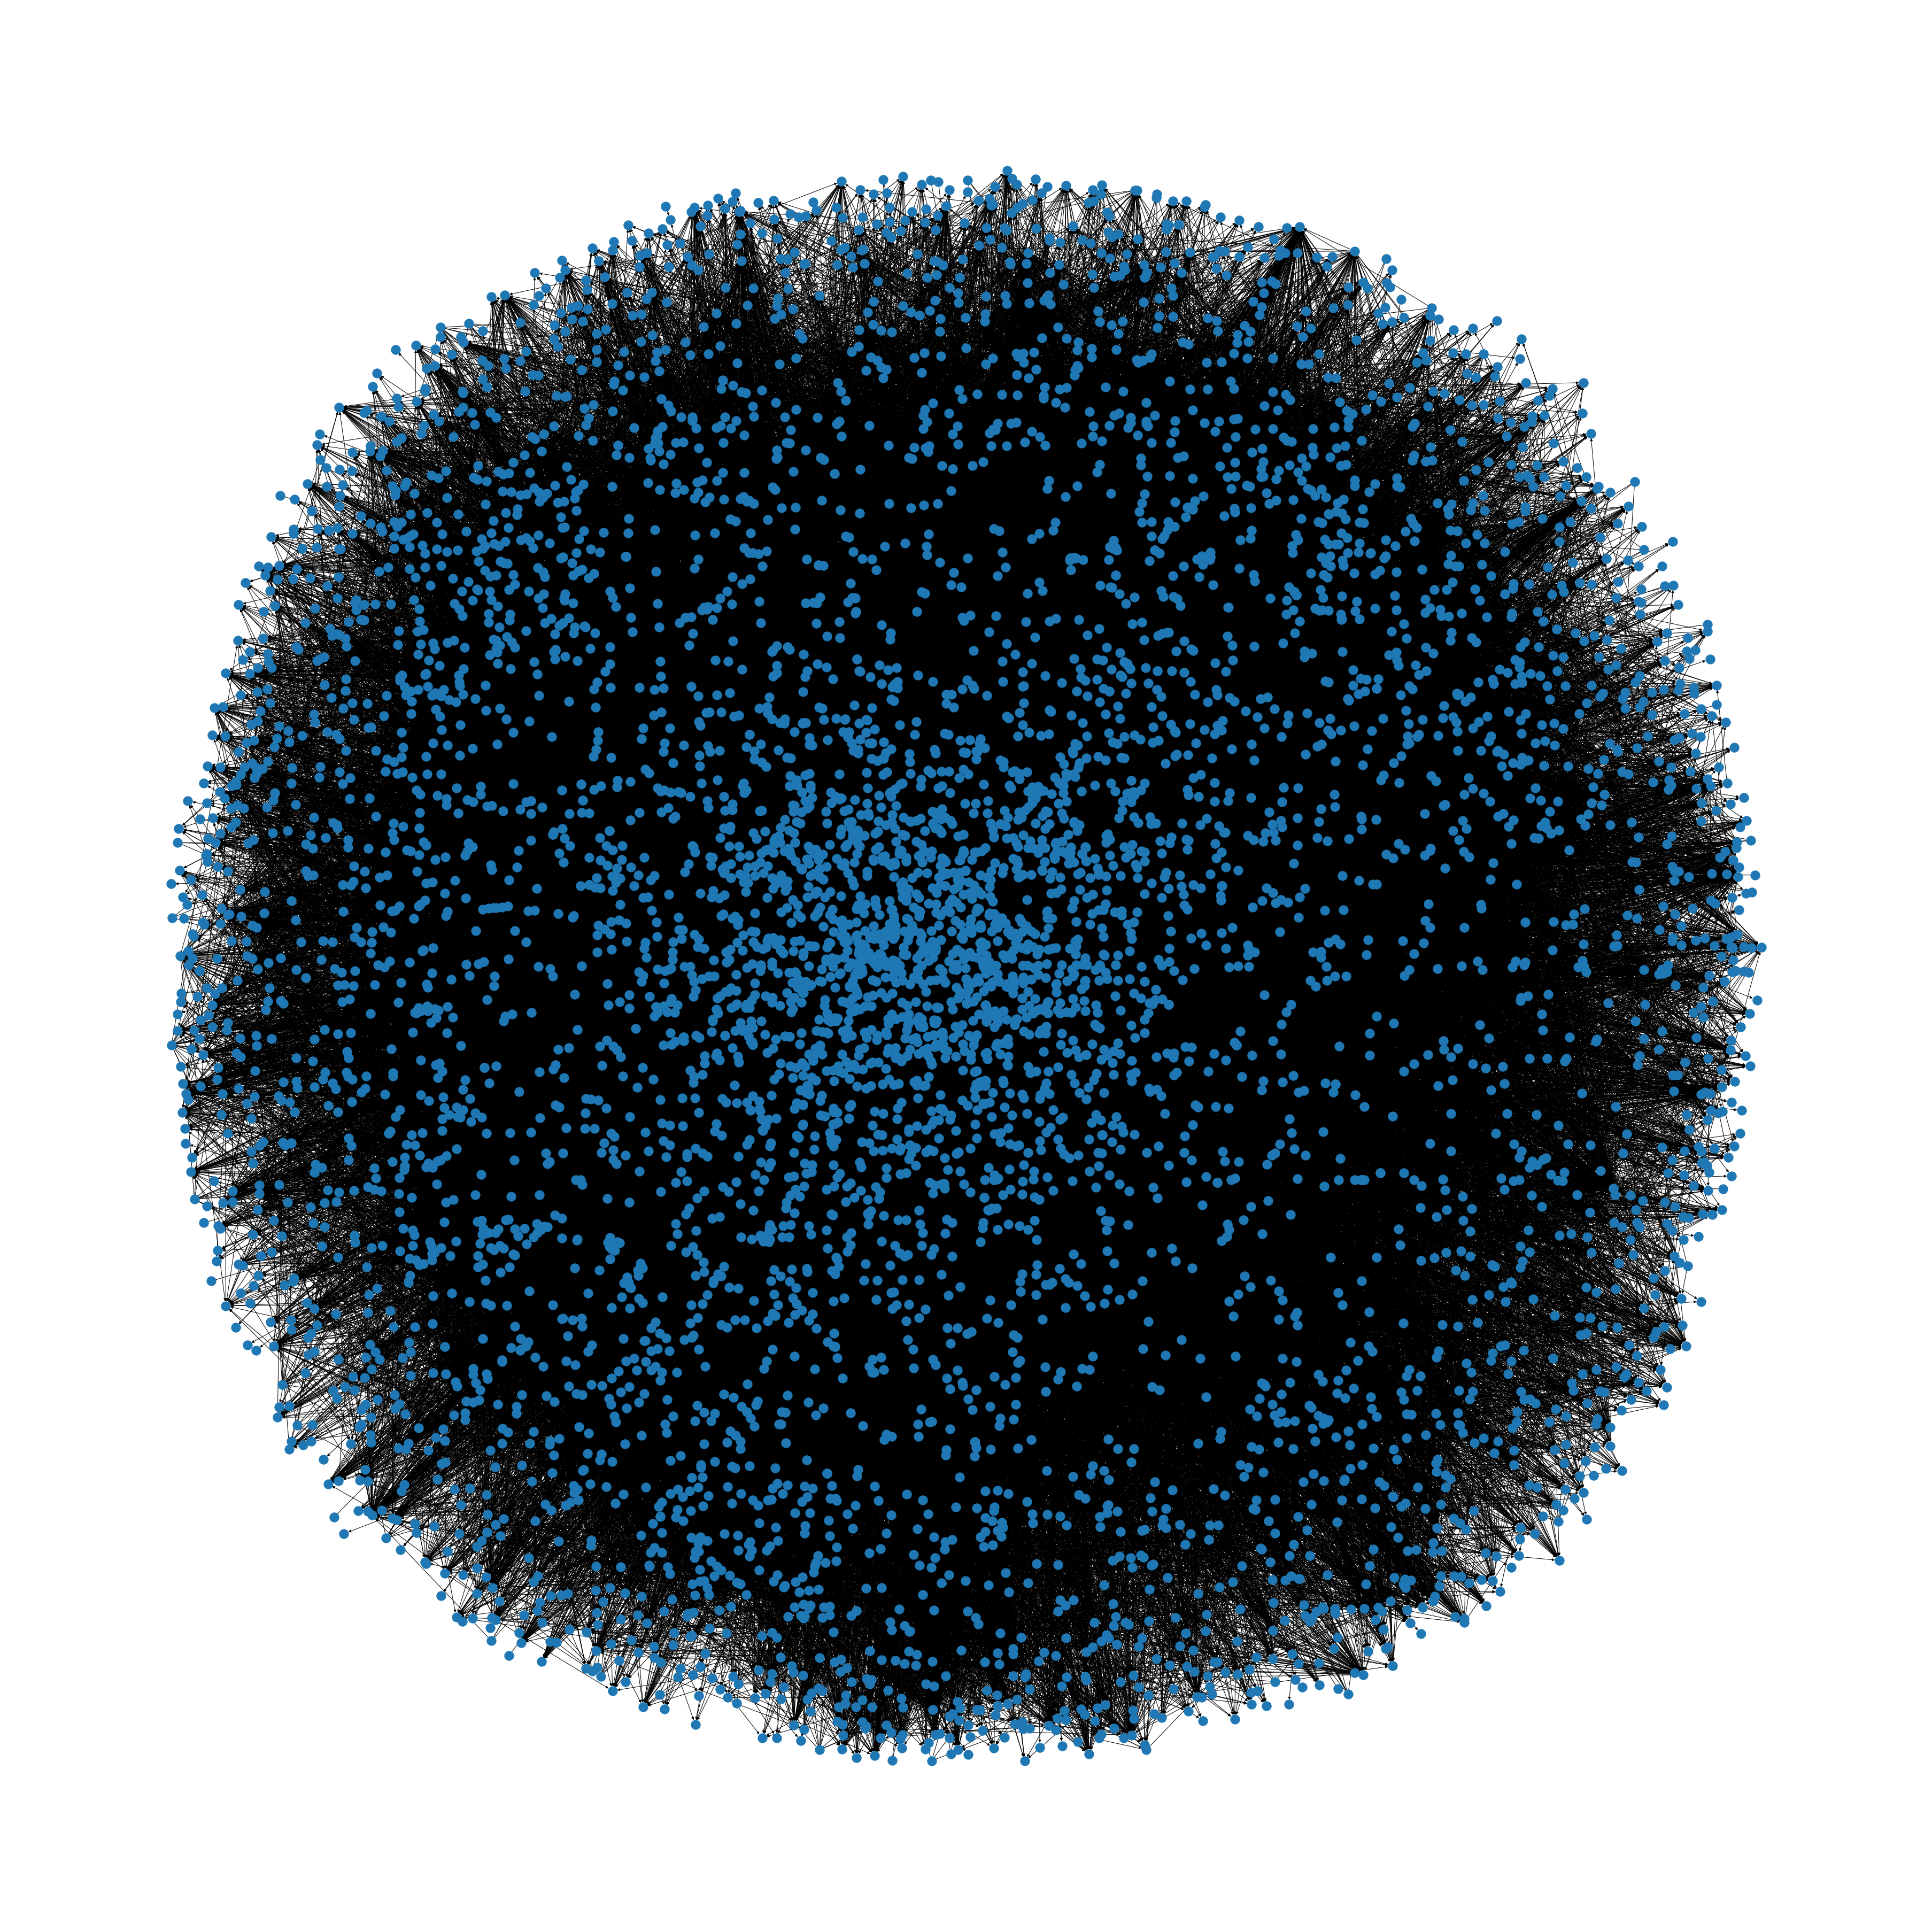

In [19]:
fig = plt.figure(figsize=(50,50))
nx.draw_spring(G_day_1)
plt.show()

In [4]:
print(nx.info(G_day_1))

Name: 
Type: DiGraph
Number of nodes: 6387
Number of edges: 55915
Average in degree:   8.7545
Average out degree:   8.7545


In [5]:
nodes = sorted(G_day_1.nodes)
k = len(nodes)
#k = 100

# Jaccard coefficient
jac = nx.jaccard_coefficient(G_day_1_undirected, [(i,j) for i,j in itertools.product(nodes[:k], nodes[:k]) 
                                                  if i!=j])
jac_df = pd.DataFrame(list(jac), columns = ['source', 'target', 'jaccard_coef'])

In [6]:
# Adamic and Adar index
ad_ad = nx.adamic_adar_index(G_day_1_undirected, [(i,j) for i,j in itertools.product(nodes[:k], nodes[:k]) 
                                                  if i!=j])
ad_ad_df = pd.DataFrame(list(ad_ad), columns = ['source', 'target', 'adamic_adar_index'])

In [7]:
# Preferential attachment
pref_att = nx.preferential_attachment(G_day_1_undirected, [(i,j) for i,j in itertools.product(nodes[:k], 
                                                            nodes[:k]) if i!=j])
pref_att_df = pd.DataFrame(list(pref_att), columns = ['source', 'target', 'preferential_attachment_index'])

In [8]:
# Clustering coefficient score
cluster_dict = nx.clustering(G_day_1)
ccs = [(i, j, (cluster_dict[i]*cluster_dict[j])) for i,j in itertools.product(nodes[:k], nodes[:k]) if i!=j]
ccs_df = pd.DataFrame(list(ccs), columns = ['source', 'target', 'clustering_coefficient_score'])

In [9]:
# Weight (= target attribute) 
weight = [(n1, n2, G_day_1.edges[n1,n2]['weight']) if (n1,n2) in G_day_1.edges else (n1, n2, 0) 
          for n1 in nodes[:k] for n2 in nodes[:k]]
weight_df = pd.DataFrame(weight, columns = ['source', 'target', 'weight'])

input_df_day_1 = jac_df.merge(ad_ad_df)
#input_df_day_1 = input_df_day_1.merge(ccpa_df)
input_df_day_1 = input_df_day_1.merge(pref_att_df)
input_df_day_1 = input_df_day_1.merge(ccs_df)
input_df_day_1 = input_df_day_1.merge(weight_df)
input_df_day_1

source  target  jaccard_coef  adamic_adar_index  \
0            304     657           0.0                0.0   
1            304     797           0.0                0.0   
2            304     932           0.0                0.0   
3            304    1277           0.0                0.0   
4            304    1437           0.0                0.0   
...          ...     ...           ...                ...   
40787377  691683  691675           0.0                0.0   
40787378  691683  691676           0.0                0.0   
40787379  691683  691677           0.0                0.0   
40787380  691683  691678           0.0                0.0   
40787381  691683  691682           0.0                0.0   

          preferential_attachment_index  clustering_coefficient_score  weight  
0                                    35                           0.0       0  
1                                     1                           0.0       0  
2                                    44                           0.0       0  
3                                    74                           0.0       0  
4                                     1                           0.0       0  
...                                 ...                           ...     ...  
40787377                            216                           0.0       0  
40787378                             24                           0.0       0  
40787379                             72                           0.0       0  
40787380                              6                           0.0       0  
40787381                             18                           0.0       0  

[40787382 rows x 7 columns]

In [10]:
input_df_day_1[input_df_day_1.weight != 0]

source  target  jaccard_coef  adamic_adar_index  \
6380         304  691675      0.000000           0.000000   
6824         657   45168      0.000000           0.000000   
7144         657   77270      0.041667           0.611274   
7373         657  107341      0.000000           0.000000   
7378         657  108019      0.011050           0.577078   
...          ...     ...           ...                ...   
40781752  691683   76577      0.000000           0.000000   
40783705  691683  503714      0.000000           0.000000   
40784076  691683  519140      0.000000           0.000000   
40784453  691683  535493      0.000000           0.000000   
40785099  691683  567774      0.000000           0.000000   

          preferential_attachment_index  clustering_coefficient_score  weight  
6380                                 36                      0.000000       1  
6824                               2695                      0.001466       1  
7144                                525                      0.003842       1  
7373                                490                      0.000000       1  
7378                               5180                      0.001454       1  
...                                 ...                           ...     ...  
40781752                            378                      0.000000       1  
40783705                            114                      0.000000      -1  
40784076                            552                      0.000000       1  
40784453                            150                      0.000000       1  
40785099                            198                      0.000000      -1  

[55670 rows x 7 columns]

Computation of features for feature set construction only based on undirected graph... although for the like relation definition, it should be a directed graph...

In [11]:
input_df_day_1.to_csv('data/input_df_day_1.csv', index = False)

In [125]:
# Common Neighbor and Centrality based Parameterized Algorithm
ccpa = nx.common_neighbor_centrality(G_day_1_undirected, [(i,j) for i,j in itertools.product(nodes[:k], nodes[:k]) 
                                                          if i!=j])
ccpa_df = pd.DataFrame(list(ccpa), columns = ['source', 'target', 'ccpa'])

KeyboardInterrupt: 

Graph with arrows per day

In [2]:
edges_days = pd.read_csv("data/vote_to_edges_days.csv")

In [3]:
G_days = nx.from_pandas_edgelist(edges_days, edge_attr = True, create_using=nx.DiGraph())

In [4]:
def computation_input_df(graph,day):
    # Creation of the input dataframe to return
    input_df = pd.DataFrame(columns = ['day', 'source', 'target', 'jaccard_coef', 'adamic_adar_index',
                                       'preferential_attachment_index', 'clustering_coefficient_score', 'weight'])
    input_df[['day', 'source', 'target']] = input_df[['day', 'source', 'target']].astype('int')
    input_df[['jaccard_coef', 'adamic_adar_index', 'preferential_attachment_index', 
              'clustering_coefficient_score', 'weight']] = input_df[['jaccard_coef', 'adamic_adar_index', 
              'preferential_attachment_index', 'clustering_coefficient_score', 'weight']].astype('float')
    
    # Creation of the subgraph for the day
    edges_day = [(x,y,d) for x,y,d in G_days.edges.data() if d['day']==day]
    sub_graph = nx.DiGraph()
    sub_graph.add_edges_from(edges_day)
    sub_graph_undirected = nx.Graph()
    sub_graph_undirected.add_edges_from(edges_day)
    nodes = sorted(sub_graph.nodes)
    # Computation of Jaccard coefficient
    jac = nx.jaccard_coefficient(sub_graph_undirected, [(i,j) for i,j in itertools.product(nodes, nodes) 
                                                        if i!=j])
    jac_df = pd.DataFrame(list(jac), columns = ['source', 'target', 'jaccard_coef'])
    jac_df['day'] = day
    print('Jaccard: ok!')
    # Computation of Adamic and Adar index
    ad_ad = nx.adamic_adar_index(sub_graph_undirected, [(i,j) for i,j in itertools.product(nodes, nodes) 
                                                        if i!=j])
    ad_ad_df = pd.DataFrame(list(ad_ad), columns = ['source', 'target', 'adamic_adar_index'])
    print('Adamic and Adar: ok!')
    input_df_day = jac_df.merge(ad_ad_df)
    # Computation of Preferential Attachment
    pref_att = nx.preferential_attachment(sub_graph_undirected, [(i,j) for i,j in itertools.product(nodes, 
                                                                  nodes) if i!=j])
    pref_att_df = pd.DataFrame(list(pref_att), columns = ['source', 'target', 'preferential_attachment_index'])
    print('Preferential Attachment: ok!')
    input_df_day = input_df_day.merge(pref_att_df)
    # Clustering coefficient score
    cluster_dict = nx.clustering(sub_graph)
    ccs = [(i, j, (cluster_dict[i]*cluster_dict[j])) for i,j in itertools.product(nodes, nodes) if i!=j]
    ccs_df = pd.DataFrame(list(ccs), columns = ['source', 'target', 'clustering_coefficient_score'])
    print('Clustering coefficient: ok!')
    input_df_day = input_df_day.merge(ccs_df)
    # Add weights
    weights = pd.DataFrame([(n1, n2, sub_graph.edges[n1,n2]['weight']) 
                                 if (n1,n2) in sub_graph.edges else (n1, n2, 0)
                                 for n1 in nodes for n2 in nodes], 
                                 columns = ['source', 'target', 'weight'])
    print('Weights: ok!')
    input_df_day = input_df_day.merge(weights)
    input_df_day.to_csv('data/input_df_day_{}.csv'.format(str(day)), index = False)
    
    return input_df_day

In [ ]:
computation_input_df(G_days,3)

In [ ]:
def computation_input_df_combined(graph,start,end):
    print('Days {}-{}'.format(str(start),str(end)))
    # Creation of the input dataframe to return
    input_df = pd.DataFrame(columns = ['day', 'source', 'target', 'jaccard_coef', 'adamic_adar_index',
                                       'preferential_attachment_index', 'clustering_coefficient_score', 'weight'])
    input_df[['day', 'source', 'target']] = input_df[['day', 'source', 'target']].astype('int')
    input_df[['jaccard_coef', 'adamic_adar_index', 'preferential_attachment_index', 
              'clustering_coefficient_score', 'weight']] = input_df[['jaccard_coef', 'adamic_adar_index', 
              'preferential_attachment_index', 'clustering_coefficient_score', 'weight']].astype('float')
    
    # Creation of the subgraph for the day
    edges_day = [(x,y,d) for x,y,d in G_days.edges.data() if (d['day']>=start) & (d['day']<=end)]
    sub_graph = nx.DiGraph()
    sub_graph.add_edges_from(edges_day)
    sub_graph_undirected = nx.Graph()
    sub_graph_undirected.add_edges_from(edges_day)
    nodes = sorted(sub_graph.nodes)
    # Computation of Jaccard coefficient
    jac = nx.jaccard_coefficient(sub_graph_undirected, [(i,j) for i,j in itertools.product(nodes, nodes) 
                                                        if i!=j])
    jac_df = pd.DataFrame(list(jac), columns = ['source', 'target', 'jaccard_coef'])
    jac_df['day'] = '{}-{}'.format(str(start), str(end))
    print('Jaccard: ok!')
    # Computation of Adamic and Adar index
    ad_ad = nx.adamic_adar_index(sub_graph_undirected, [(i,j) for i,j in itertools.product(nodes, nodes) 
                                                        if i!=j])
    ad_ad_df = pd.DataFrame(list(ad_ad), columns = ['source', 'target', 'adamic_adar_index'])
    print('Adamic and Adar: ok!')
    input_df_day = jac_df.merge(ad_ad_df)
    # Computation of Preferential Attachment
    pref_att = nx.preferential_attachment(sub_graph_undirected, [(i,j) for i,j in itertools.product(nodes, 
                                                                  nodes) if i!=j])
    pref_att_df = pd.DataFrame(list(pref_att), columns = ['source', 'target', 'preferential_attachment_index'])
    print('Preferential Attachment: ok!')
    input_df_day = input_df_day.merge(pref_att_df)
    # Clustering coefficient score
    cluster_dict = nx.clustering(sub_graph)
    ccs = [(i, j, (cluster_dict[i]*cluster_dict[j])) for i,j in itertools.product(nodes, nodes) if i!=j]
    ccs_df = pd.DataFrame(list(ccs), columns = ['source', 'target', 'clustering_coefficient_score'])
    print('Clustering coefficient: ok!')
    input_df_day = input_df_day.merge(ccs_df)
    # Add weights
    weights = pd.DataFrame([(n1, n2, sub_graph.edges[n1,n2]['weight']) 
                                 if (n1,n2) in sub_graph.edges else (n1, n2, 0)
                                 for n1 in nodes for n2 in nodes], 
                                 columns = ['source', 'target', 'weight'])
    print('Weights: ok!')
    input_df_day = input_df_day.merge(weights)
    input_df_day.to_csv('data/input/Combined days/input_df_day_{}_{}.csv'.format(str(start),str(end)), 
                        index = False)
    
    return input_df_day

In [ ]:
computation_input_df_combined(G_days,1,4)